## Problem Statement:
   Implement a KNN model to classify the animals in to categorie

# 1.Import Necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# 2.Import Data

In [2]:
zoo_data=pd.read_csv('Zoo.csv')
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# 3.Data Understanding

In [3]:
zoo_data.shape

(101, 18)

In [4]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
#WE DONT HAVE ANY NULL VALUES AND EVERYTHING IS IN INTEGER, SO THE DATASET IS CLEAR

In [6]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
zoo_data1=zoo_data.drop('animal name', axis=1)
zoo_data1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Splitting the data into Training and Testing Parts

In [8]:
x=zoo_data1.iloc[:,0:-1]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [9]:
y=zoo_data1['type']
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

### GridSearchCV:
>GridSearchCV will try all combinations of those parameters, evaluate the results using cross-validation, and the scoring metric you provide. In the end, it will spit the best parameters for your data set

In [10]:
#Before we use KNN First we will define the K-value from GridSearchCv

In [11]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [12]:
n_neighbors=np.array(range(1,30))
param_grid= dict(n_neighbors=n_neighbors)

In [13]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}

In [14]:
#k-values(The range that i have defined i.e., from 1 to 30)

In [15]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [16]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


In [17]:
#Therefore for optimum K-value 1 we got the highest accuracy score

## Trying to find the best k-value for k nearest neighbours by Plotting:

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range= range(1,30)
k_scores=[]

### uses iteration to caclulate different k in models, then return the average accuracy based on the cross validation

In [19]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

## Visualizing

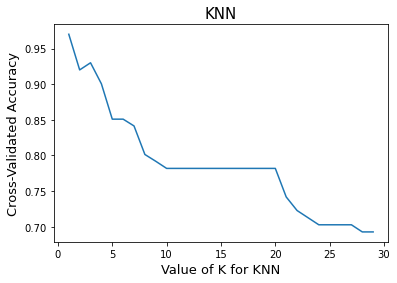

In [24]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN',size=13)
plt.ylabel('Cross-Validated Accuracy',size=13)
plt.title('KNN',size=15)
plt.show()

## Inference:
   >So we can clearly see that for least k-value the accuracy score is high, as we increase the k-value the accuracy is being decreased. So the best possible k-value is '1' 

# Building The Model

In [25]:
num_folds = 10
kfold = KFold(n_splits=10)

In [26]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, x, y, cv=kfold)

In [27]:
results

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 0.9])

In [28]:
#Average of all the scores
results.mean()

0.9800000000000001

### Inference:
 >n_neighbors=1 since we got the best k-value with high accuracy from GridSearchCV

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y , train_size=0.8,random_state=0)

In [30]:
x_train.shape,y_train.shape

((80, 16), (80,))

In [31]:
x_test.shape, y_test.shape

((21, 16), (21,))

In [32]:
#predicting
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_test

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2],
      dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score( y_test,y_pred_test)

1.0


>Creating a column of test data and Appending the predicted y values to the y test data column

In [34]:
test_data=pd.DataFrame(y_test)
test_data

,type
26,5
86,4
2,4
55,1
75,1
94,1
16,2
73,4
54,1
96,1


In [35]:
test_data['y_predicted']=y_pred_test

In [36]:
test_data

,type,y_predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


### Inference:
   >So from the all observations we can say that the accuracy score is 100% ,And our model is predicting well

# THE END!